In [15]:
import os
import requests
import pandas as pd

# --- Visualization ---
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# --- Machine Learning ---
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report, 
    confusion_matrix,
    ConfusionMatrixDisplay
)

font_url = "https://github.com/google/fonts/raw/main/ofl/kanit/Kanit-Regular.ttf"
font_filename = "Kanit-Regular.ttf"

if not os.path.exists(font_filename):
    print(f"กำลังดาวน์โหลดฟอนต์ {font_filename} ...")
    response = requests.get(font_url)
    with open(font_filename, 'wb') as f:
        f.write(response.content)
    print("ดาวน์โหลดเสร็จสิ้น!")
else:
    print(f"พบฟอนต์ {font_filename} ในเครื่องแล้ว ใช้งานต่อได้เลย")

fm.fontManager.addfont(font_filename)

df_telco = pd.read_csv('telco-dataset.csv')

plt.rc('font', family='Kanit')
plt.rc('font', size=12)

sns.set_theme(style="whitegrid")
plt.rc('font', family='Kanit')

พบฟอนต์ Kanit-Regular.ttf ในเครื่องแล้ว ใช้งานต่อได้เลย


C:\Users\usEr\AppData\Local\Temp\ipykernel_13632\652988168.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=check_null.index, y=check_null.values, palette='viridis')


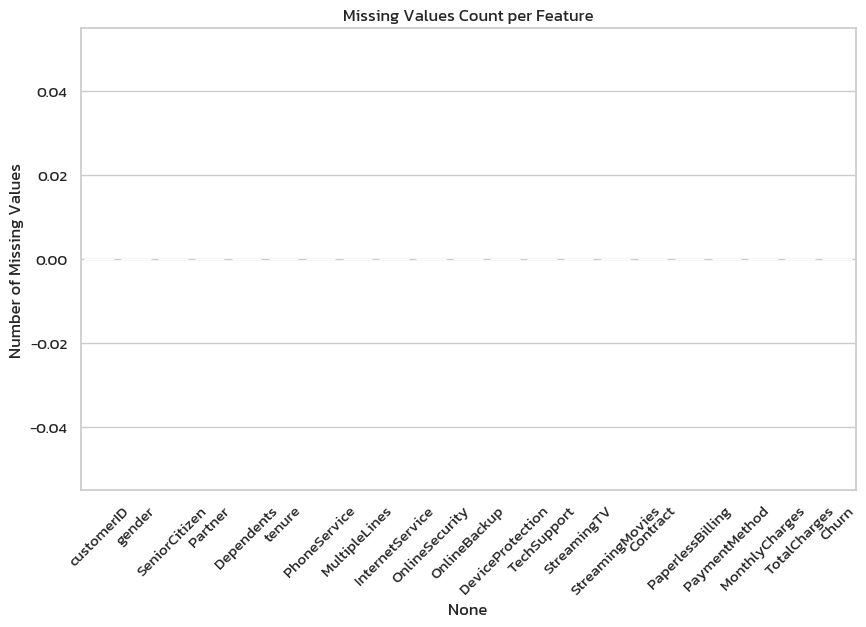

In [ ]:
## Check null values
check_null = df_telco.isnull().sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=check_null.index, y=check_null.values, palette='viridis')
plt.xticks(rotation=30)
plt.title('Missing Values Count per Feature')
plt.ylabel('Number of Missing Values')
plt.show()


In [3]:
# --- ส่วนการเตรียมข้อมูล ---
df_telco['Churn_Result'] = df_telco['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
x = df_telco.drop(['Churn', 'Churn_Result', 'customerID'], axis=1)
x = pd.get_dummies(x, drop_first=True)
y = df_telco['Churn_Result']

# แบ่งข้อมูล (ใช้ X และ y ดั้งเดิม)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

#--- ส่วนของโมเดล (Random Forest) ---

param_grid = {
    'n_estimators': [100, 200],   
    'max_depth': [10, 15],           
    'min_samples_split': [5, 10],    
    'max_features': ['sqrt']         
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    cv=3,            
    scoring='f1',    
    n_jobs=1,        
    verbose=2       
)

grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

# วัดผลด้วย best_model
x_pred_test = best_model.predict(x_test)
x_pred_train = best_model.predict(x_train)

print(classification_report(y_test, x_pred_test))
print(classification_report(y_train, x_pred_train))

train_acc = accuracy_score(y_train, x_pred_train)
test_acc = accuracy_score(y_test, x_pred_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Gap: {train_acc - test_acc:.4f}")



Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=s

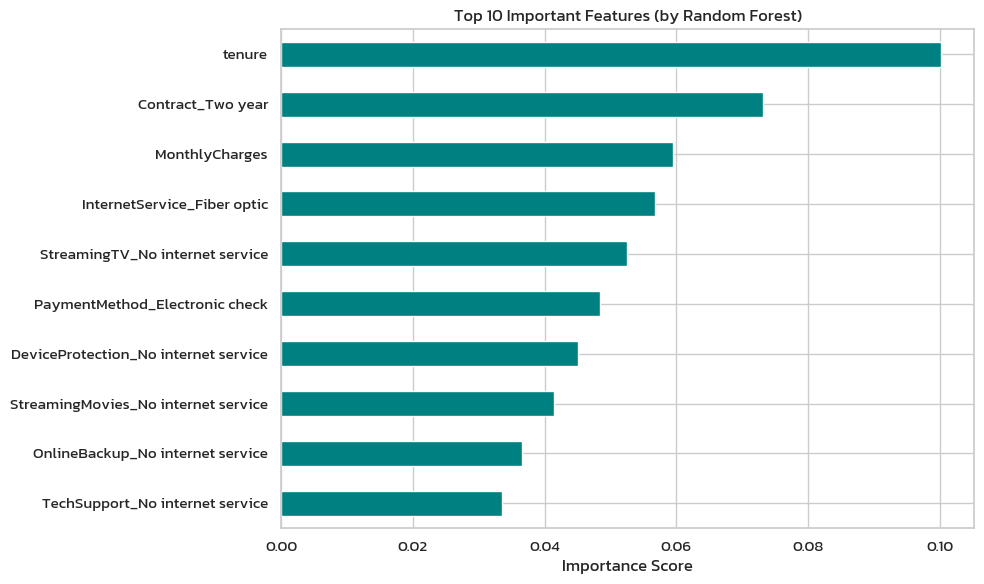

SeniorCitizen          1.851868e-02
tenure                 1.002121e-01
MonthlyCharges         5.951348e-02
gender_Male            9.935974e-04
Partner_Yes            1.902265e-02
                           ...     
TotalCharges_997.75    7.455999e-07
TotalCharges_998.1     9.288420e-07
TotalCharges_999.45    1.128655e-04
TotalCharges_999.8     3.492233e-06
TotalCharges_999.9     2.022609e-05
Length: 6559, dtype: float64

In [ ]:
#ดึงค่าความสำคัญจากโมเดลโดยตรง
feat_importances = pd.Series(best_model.feature_importances_, index=x_train.columns)

#พล๊อต 10 อันดับแรก
plt.figure(figsize=(10, 6))
feat_importances.nlargest(10).sort_values().plot(kind='barh', color='teal')
plt.title("Top 10 Important Features (by Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

Precision: 0.4760
Recall: 0.8235
F1 Score: 0.6033


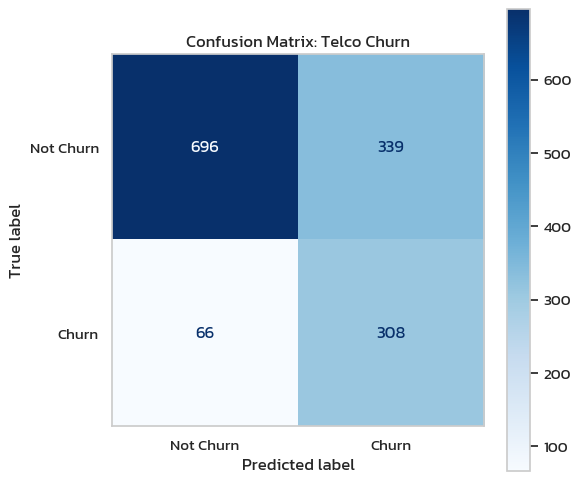

In [23]:
cm = confusion_matrix(y_test, x_pred_test)

precision = precision_score(y_test, x_pred_test)
recal = recall_score(y_test, x_pred_test)
f1 = f1_score(y_test, x_pred_test)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recal:.4f}')
print(f'F1 Score: {f1:.4f}')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churn', 'Churn'])

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d', ax=ax)
ax.grid(False)
plt.title("Confusion Matrix: Telco Churn")
plt.show()

In [5]:
df_telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Result
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [ ]:
churn_users = df_telco[df_telco['Churn'] == 'Yes']

sns.displot(data=churn_users, x='tenure', kind='hist',bins=7)

sns.displot(data=df_telco, x='PaymentMethod', col='Churn', kind='hist',bins=7)

sns.displot(data=churn_users, x='MonthlyCharges', kind='hist',bins=7)

sns.displot(data=churn_users, x='Contract', kind='hist',bins=7)


C:\Users\usEr\AppData\Local\Temp\ipykernel_23484\1526763871.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_users, x='PaymentMethod', palette='viridis', ax=axes[1, 0])
C:\Users\usEr\AppData\Local\Temp\ipykernel_23484\1526763871.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_users, x='Contract', palette='magma', ax=axes[1, 1])


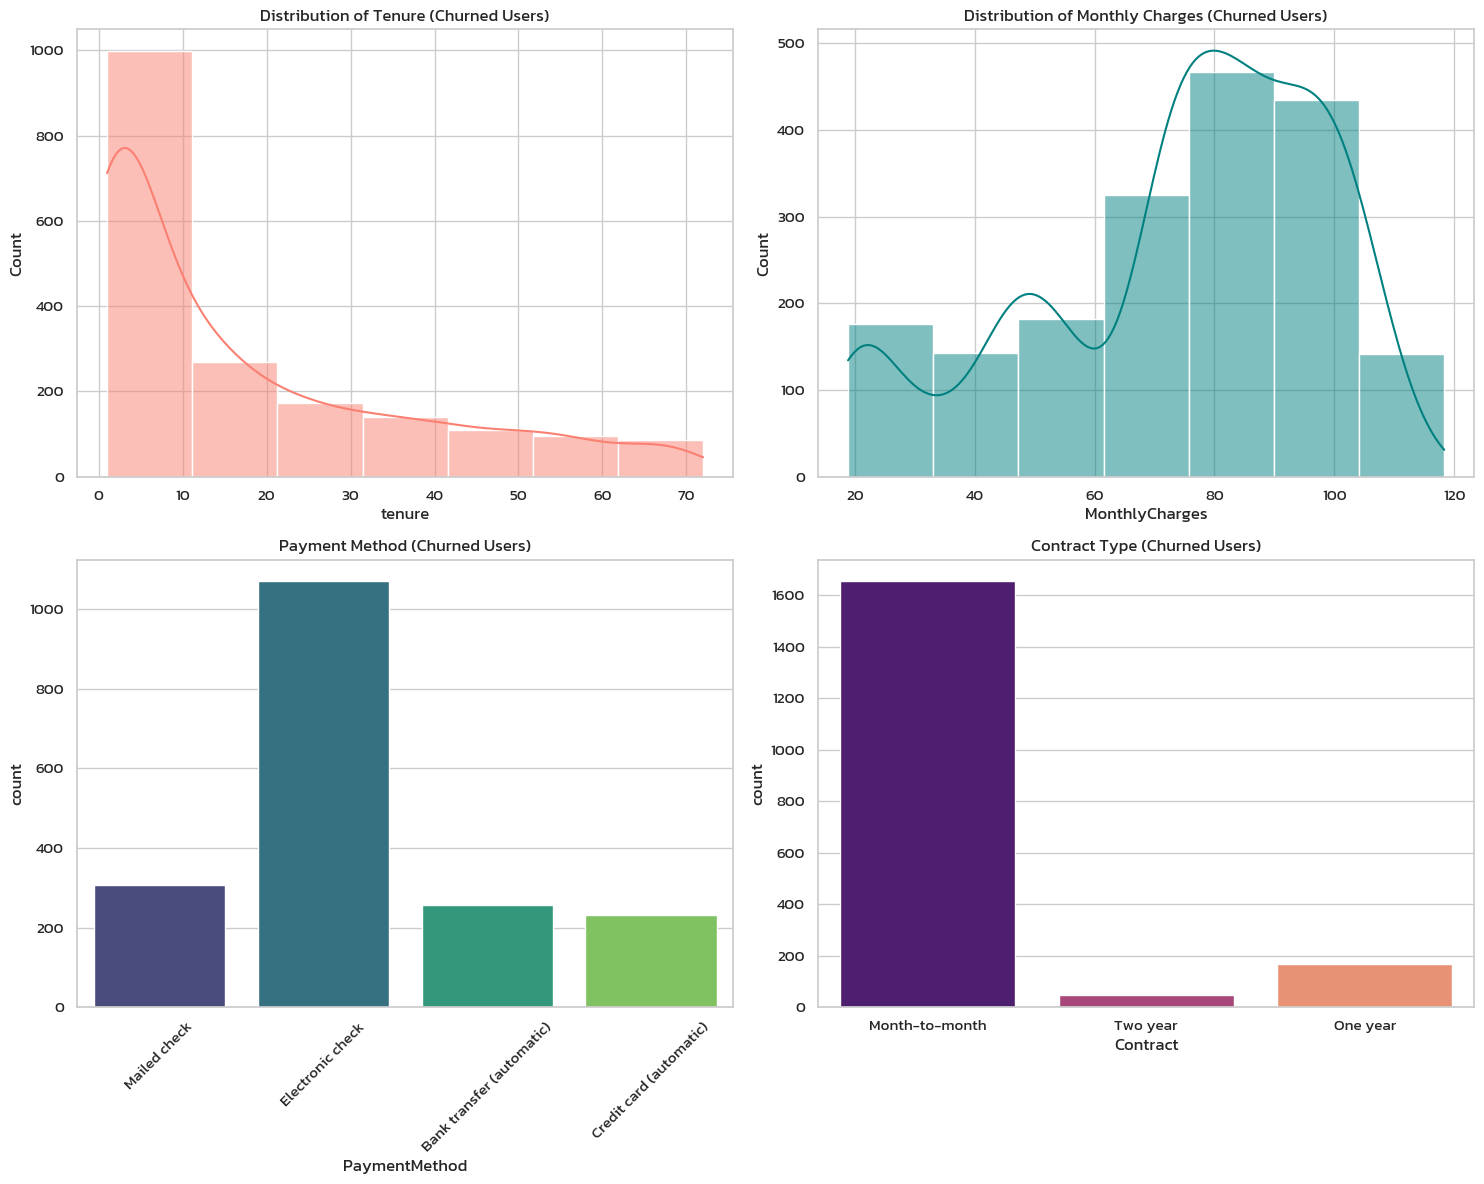

In [19]:
# 1. สร้างกรอบ (Figure) และ ช่องกราฟ (Axes) ขนาด 2 แถว x 2 คอลัมน์
# figsize=(15, 10) คือขนาดกว้าง x สูง ของรูปใหญ่
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# ---------------------------------------------------------
# กราฟที่ 1: Tenure (บนซ้าย -> axes[0, 0])
# เป็นตัวเลข ใช้ histplot
sns.histplot(data=churn_users, x='tenure', bins=7, kde=True, color='salmon', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Tenure (Churned Users)')

# ---------------------------------------------------------
# กราฟที่ 2: MonthlyCharges (บนขวา -> axes[0, 1])
# เป็นตัวเลข ใช้ histplot
sns.histplot(data=churn_users, x='MonthlyCharges', bins=7, kde=True, color='teal', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Monthly Charges (Churned Users)')

# ---------------------------------------------------------
# กราฟที่ 3: PaymentMethod (ล่างซ้าย -> axes[1, 0])
# เป็นหมวดหมู่ (Category) ใช้ countplot จะสวยกว่า hist
sns.countplot(data=churn_users, x='PaymentMethod', palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Payment Method (Churned Users)')
axes[1, 0].tick_params(axis='x', rotation=45) # เอียงตัวหนังสือ 45 องศา กันทับกัน

# ---------------------------------------------------------
# กราฟที่ 4: Contract (ล่างขวา -> axes[1, 1])
# เป็นหมวดหมู่ (Category) ใช้ countplot
sns.countplot(data=churn_users, x='Contract', palette='magma', ax=axes[1, 1])
axes[1, 1].set_title('Contract Type (Churned Users)')

# จัดระยะห่างระหว่างกราฟให้อัตโนมัติ
plt.tight_layout()
plt.show()